In [140]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Web Scraping
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [141]:
file_path = "./data/College_Data.csv"
college_data = pd.read_csv(file_path)
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [142]:
college_data.rename(columns={"Unnamed: 0":"Name"}, inplace=True)
college_data.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [143]:
features = ["Name", "Apps", "Accept", "Grad.Rate"]

simple_data = college_data[features]
simple_data.describe()

,Apps,Accept,Grad.Rate
count,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,65.46332
std,3870.201484,2451.113971,17.17771
min,81.000000,72.000000,10.00000
25%,776.000000,604.000000,53.00000
50%,1558.000000,1110.000000,65.00000
75%,3624.000000,2424.000000,78.00000
max,48094.000000,26330.000000,118.00000


In [144]:
simple_data["Ratio"] = simple_data["Accept"] / simple_data["Apps"]
simple_data.head()

,Name,Apps,Accept,Grad.Rate,Ratio
0,Abilene Christian University,1660,1232,60,0.742169
1,Adelphi University,2186,1924,56,0.880146
2,Adrian College,1428,1097,54,0.768207
3,Agnes Scott College,417,349,59,0.836930
4,Alaska Pacific University,193,146,15,0.756477


In [145]:
simple_data.sort_values(by="Ratio", ascending=False, inplace=True)

In [146]:
simple_data[simple_data["Grad.Rate"] > 100]

,Name,Apps,Accept,Grad.Rate,Ratio
95,Cazenovia College,3847,3433,118,0.892384


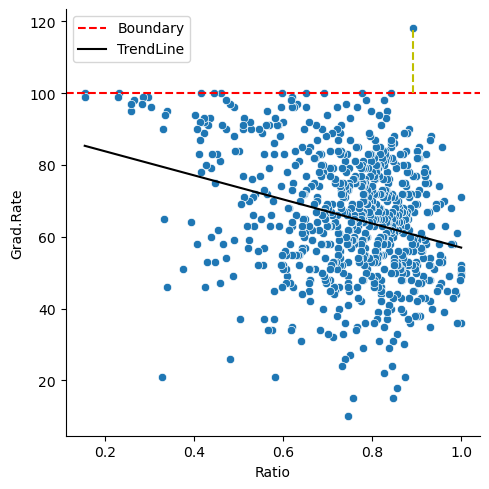

In [147]:
x = simple_data["Ratio"]
y = simple_data["Grad.Rate"]

sns.relplot(x=x, y=y, data=simple_data)
plt.axhline(y=100, color='r', linestyle='--', label='Boundary')
plt.vlines(.892, 100, 118, color='y', linestyle='--')

z = np.polyfit(x, y, deg=1)
p = np.poly1d(z)
plt.plot(x, p(x), label='TrendLine', color='black')

leg = plt.legend(loc='upper left')

### The Graph Seems to show Little Correlation Between Graduation Rate and Acceptance Rate

In [148]:
file_path = "./data/student_data/cc_institution_details.csv"
college_data_2 = pd.read_csv(file_path)
college_data_2.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [149]:
college_data_2.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [150]:
features = ['index', 'chronname', 'city', 'state', 'level', 'control', 
            'ft_pct', 'grad_100_value', 'grad_150_value','retain_value', ]
college_data_2 = college_data_2[features]
college_data_2.set_index("chronname", inplace=True)
college_data_2.head()

,index,city,state,level,control,ft_pct,grad_100_value,grad_150_value,retain_value
chronname,,,,,,,,,
Alabama A&M University,0,Normal,Alabama,4-year,Public,93.8,10.0,29.1,63.1
University of Alabama at Birmingham,1,Birmingham,Alabama,4-year,Public,72.7,29.4,53.5,80.2
Amridge University,2,Montgomery,Alabama,4-year,Private not-for-profit,62.7,0.0,66.7,37.5
University of Alabama at Huntsville,3,Huntsville,Alabama,4-year,Public,74.4,16.5,48.4,81.0
Alabama State University,4,Montgomery,Alabama,4-year,Public,91.0,8.8,25.2,62.2


In [151]:
file_path = "./data/samson_acc_rates.csv"
acc_data = pd.read_csv(file_path)
acc_data.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [152]:
acc_data = acc_data[["Name", "Applicants total", "Admissions total"]]

In [153]:
acc_data.set_index("Name", inplace=True)
acc_data.head()

,Applicants total,Admissions total
Name,,
Alabama A & M University,6142.0,5521.0
University of Alabama at Birmingham,5689.0,4934.0
Amridge University,NaN,NaN
University of Alabama in Huntsville,2054.0,1656.0
Alabama State University,10245.0,5251.0


In [154]:
combined_data = pd.merge(acc_data, college_data_2, left_index=True, right_index=True)
combined_data.head()

,Applicants total,Admissions total,index,city,state,level,control,ft_pct,grad_100_value,grad_150_value,retain_value
Abilene Christian University,10188.0,4986.0,2602,Abilene,Texas,4-year,Private not-for-profit,94.2,36.7,56.6,79.4
Adelphi University,8654.0,5897.0,1665,Garden City,New York,4-year,Private not-for-profit,89.9,52.5,62.5,81.1
Adrian College,4675.0,2631.0,1246,Adrian,Michigan,4-year,Private not-for-profit,95.9,38.5,54.2,58.1
Agnes Scott College,1340.0,896.0,593,Decatur,Georgia,4-year,Private not-for-profit,98.0,66.1,72.0,82.8
Alabama State University,10245.0,5251.0,4,Montgomery,Alabama,4-year,Public,91.0,8.8,25.2,62.2


In [155]:
combined_data.columns
combined_data.drop(columns=["index"], inplace=True)

In [160]:
combined_data["acc_rate"] = combined_data["Admissions total"] / combined_data["Applicants total"]
combined_data.head()

,Applicants total,Admissions total,city,state,level,control,ft_pct,grad_100_value,grad_150_value,retain_value,acc_rate
Abilene Christian University,10188.0,4986.0,Abilene,Texas,4-year,Private not-for-profit,94.2,36.7,56.6,79.4,0.489399
Adelphi University,8654.0,5897.0,Garden City,New York,4-year,Private not-for-profit,89.9,52.5,62.5,81.1,0.681419
Adrian College,4675.0,2631.0,Adrian,Michigan,4-year,Private not-for-profit,95.9,38.5,54.2,58.1,0.562781
Agnes Scott College,1340.0,896.0,Decatur,Georgia,4-year,Private not-for-profit,98.0,66.1,72.0,82.8,0.668657
Alabama State University,10245.0,5251.0,Montgomery,Alabama,4-year,Public,91.0,8.8,25.2,62.2,0.512543


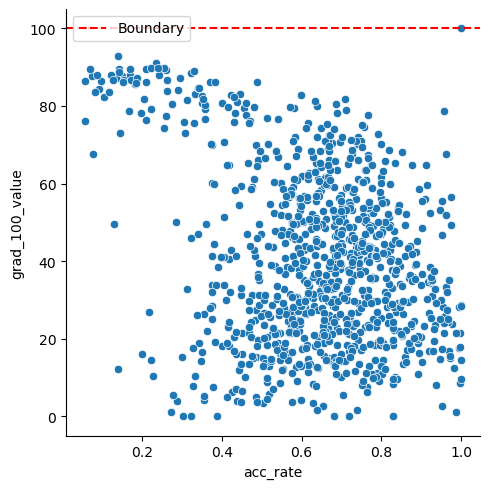

In [163]:
x = combined_data["acc_rate"]
y = combined_data["grad_100_value"]

sns.relplot(x=x, y=y, data=combined_data)
plt.axhline(y=100, color='r', linestyle='--', label='Boundary')

leg = plt.legend(loc='upper left')